# Predict Fuel Efficiency Using Tensorflow in Python

#### Predicting fuel efficiency is a important task in automotive design and environmental sustainability. In this article we will build a fuel efficiency prediction model using TensorFlow one of the most popular deep learning libraries.

### Step 1: Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import tensorflow as tf
from tensorflow import keras
from keras import layers

import warnings
warnings.filterwarnings('ignore')

### Step 2: Load the Dataset

In [3]:
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.shape

(398, 9)

### Step 3: Exploratory Data Analysis (EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### Data Cleaning

In [7]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [8]:
print(df.shape)
df = df[df['horsepower'] != '?']
print(df.shape)

(398, 9)
(392, 9)


In [9]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [10]:
df['horsepower'] = df['horsepower'].astype(int)
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [11]:
df.nunique()

mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
model year       13
origin            3
car name        301
dtype: int64

### Visualizing the Impact of Categorical Variables on MPG

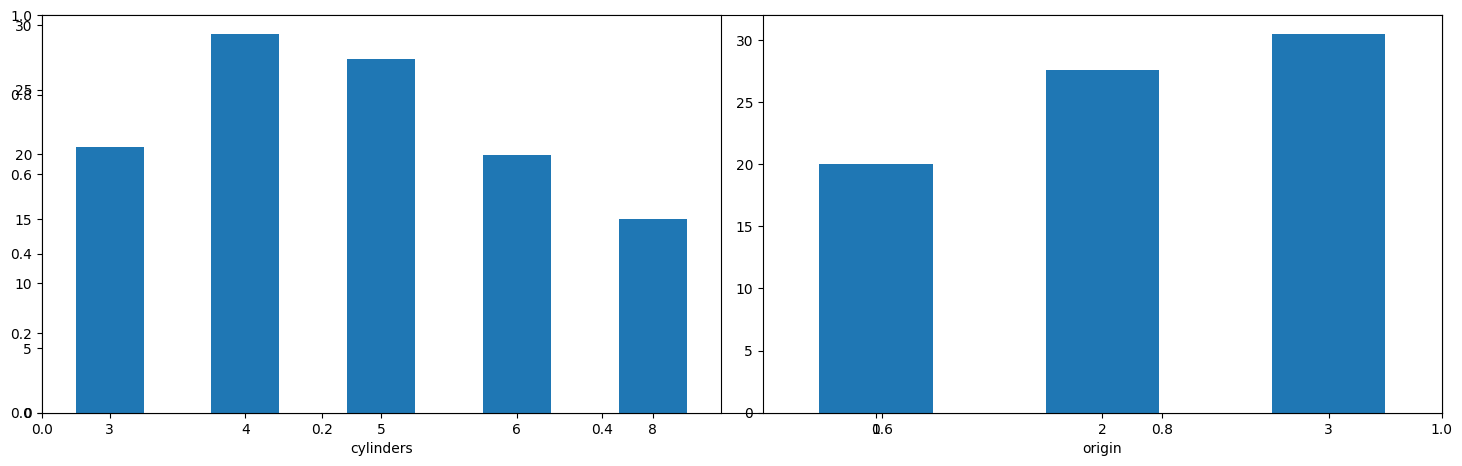

In [12]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

plt.subplots(figsize=(15, 5))
for i, col in enumerate(['cylinders', 'origin']):
    plt.subplot(1, 2, i+1)
    x = numeric_df.groupby(col).mean()['mpg']
    x.plot.bar()
    plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Correlation Analysis

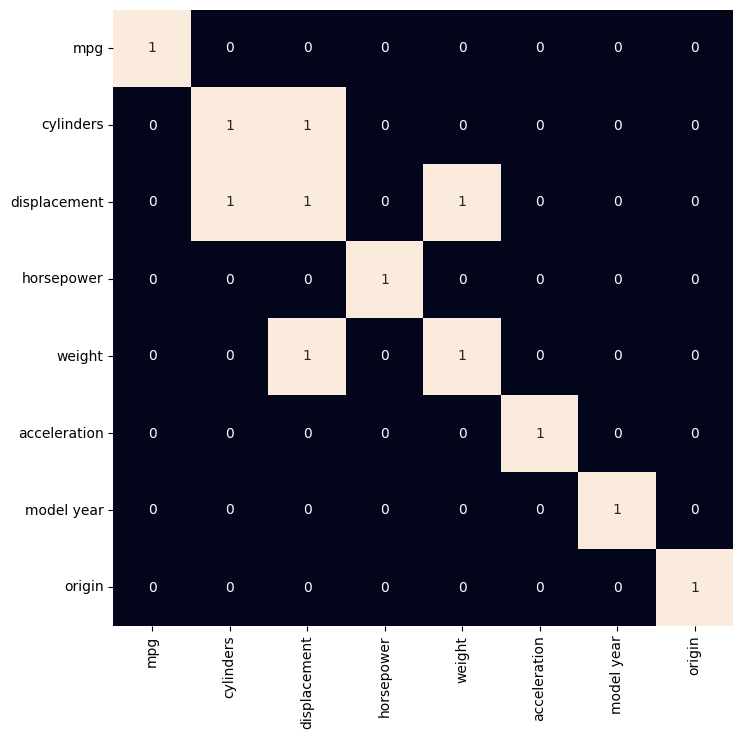

In [13]:
plt.figure(figsize=(8, 8)) 
sb.heatmap(numeric_df.corr() > 0.9, 
		annot=True, 
		cbar=False) 
plt.show()

In [14]:
df.drop('displacement',
        axis=1,
        inplace=True)

In [16]:
df.head()

,mpg,cylinders,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,140,3449,10.5,70,1,ford torino


### Step 4: Data Preprocessing

### Split Data into Features and Target

In [17]:
from sklearn.model_selection import train_test_split
features = df.drop(['mpg', 'car name'], axis=1)
target = df['mpg'].values

X_train, X_val, \
    Y_train, Y_val = train_test_split(features, target,
                                      test_size=0.2,
                                      random_state=22)
X_train.shape, X_val.shape

((313, 6), (79, 6))

### Create TensorFlow Data Pipeline

In [18]:
AUTO = tf.data.experimental.AUTOTUNE

train_ds = (
    tf.data.Dataset
    .from_tensor_slices((X_train, Y_train))
    .batch(32)
    .prefetch(AUTO)
)

val_ds = (
    tf.data.Dataset
    .from_tensor_slices((X_val, Y_val))
    .batch(32)
    .prefetch(AUTO)
)

### Step 5: Define the Model

In [19]:
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[6]),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1, activation='relu')
])

### Next, we compile the model by specifying the:

- optimizer (adam)
- loss function (mae for Mean Absolute Error)
- evaluation metric (mape for Mean Absolute Percentage Error):

In [20]:
model.compile(
    loss='mae',
    optimizer='adam',
    metrics=['mape']
)

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 69,889 (273.00 KB)

 Trainable params: 68,865 (269.00 KB)

 Non-trainable params: 1,024 (4.00 KB)

### Step 6: Model Training

- We train the model for 50 epochs using the training and validation datasets. The training process will optimize the model based on the loss and metric we defined earlier:

In [22]:
history = model.fit(train_ds,
                    epochs=50,
                    validation_data=val_ds)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 20.9620 - mape: 90.5755 - val_loss: 22.4190 - val_mape: 100.0000
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 18.2918 - mape: 81.4446 - val_loss: 22.4190 - val_mape: 100.0000
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17.0113 - mape: 76.9967 - val_loss: 22.4190 - val_mape: 100.0000
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 15.6950 - mape: 72.3555 - val_loss: 22.4190 - val_mape: 100.0000
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 14.4922 - mape: 68.1206 - val_loss: 22.4190 - val_mape: 100.0000
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 13.3328 - mape: 63.8484 - val_loss: 22.4190 - val_mape: 100.0000
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 12.4557 - mape: 60.7894 - val_loss: 22.4190 - val_mape: 100.0000
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.7100 - mape: 57.8630 - val_loss: 22.4190 - val_mape: 100.0000
Epoch 9/5

### Step 7: Evaluate the Model

In [23]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,mape,val_loss,val_mape
0,20.962021,90.575546,22.418987,100.0
1,18.291784,81.444618,22.418987,100.0
2,17.011326,76.996666,22.418987,100.0
3,15.695004,72.355537,22.418987,100.0
4,14.492150,68.120560,22.418987,100.0


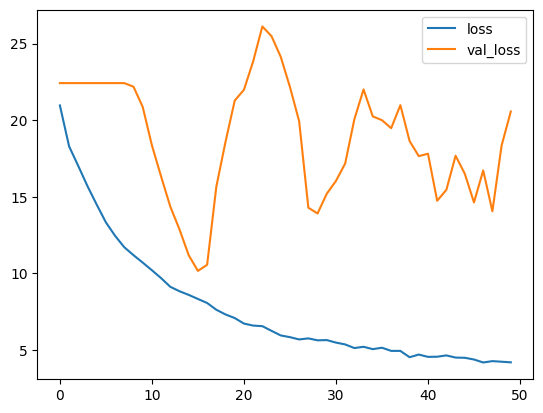

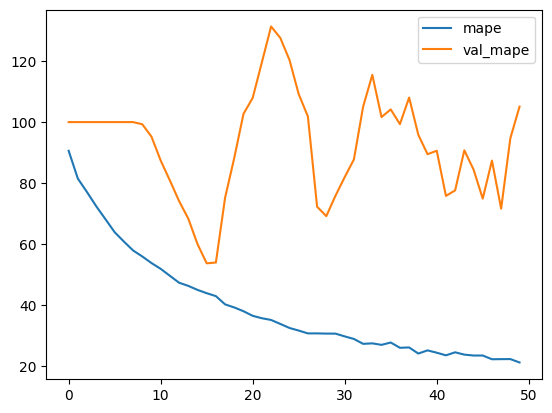

In [24]:
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['mape', 'val_mape']].plot()
plt.show()

## Prediction Part 

In [26]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

In [27]:
# Set up Min-Max Scaler
scaler = MinMaxScaler()

# Fit scaler on training features
X_train_scaled = scaler.fit_transform(X_train)

# Transform validation features
X_val_scaled = scaler.transform(X_val)

# Replace TensorFlow datasets
train_ds = tf.data.Dataset.from_tensor_slices((X_train_scaled, Y_train)).batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = tf.data.Dataset.from_tensor_slices((X_val_scaled, Y_val)).batch(32).prefetch(tf.data.AUTOTUNE)


In [42]:
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 10.8173 - mae: 2.4388 - val_loss: 79.1595 - val_mae: 6.0993
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 10.8693 - mae: 2.5243 - val_loss: 44.5202 - val_mae: 5.0126
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.2640 - mae: 2.3121 - val_loss: 28.2564 - val_mae: 4.2595
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.8688 - mae: 2.3628 - val_loss: 33.0352 - val_mae: 4.5150
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.8611 - mae: 2.4120 - val_loss: 37.2153 - val_mae: 4.7287
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.9112 - mae: 2.2567 - val_loss: 36.3967 - val_mae: 4.7311
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.0675 - mae: 2.3348 - val_loss: 35.9922 - val_mae: 4.7712
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.8357 - mae: 2.2922 - val_loss: 33.3345 - val_mae: 4.5588
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss:

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
   Actual_MPG  Predicted_MPG
0        22.3      21.299711
1        25.0      24.132973
2        19.0      21.751074
3        17.5      19.631346
4        28.4      22.198278


##  Predict on New Data

In [40]:
# New car input, 6 features in correct order
new_car = np.array([[4, 140, 90, 2265, 15.5, 70]])

# Direct prediction, no scaler
predicted_mpg = model.predict(new_car)

print("Predicted MPG:", float(predicted_mpg[0][0]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted MPG: 0.0


In [34]:
print("Model input shape:", model.input_shape)
print("New car shape:", new_car_scaled.shape)
print("Scaled new car:", new_car_scaled)

Model input shape: (None, 6)
New car shape: (1, 6)
Scaled new car: [[  0.2          0.51086957  -0.43181174 134.3452381   -4.54166667
   34.5       ]]


In [39]:
print("MPG min:", Y_train.min())
print("MPG max:", Y_train.max())
print("Any NaN in Y:", np.isnan(Y_train).any())


MPG min: 9.0
MPG max: 44.6
Any NaN in Y: False


In [44]:
from sklearn.preprocessing import MinMaxScaler

# Target scaler
Y_scaler = MinMaxScaler()

Y_train_scaled = Y_scaler.fit_transform(Y_train.reshape(-1, 1))
Y_val_scaled = Y_scaler.transform(Y_val.reshape(-1, 1))


In [45]:
X_scaler = MinMaxScaler()

X_train_scaled = X_scaler.fit_transform(X_train)
X_val_scaled = X_scaler.transform(X_val)


In [46]:
model.fit(
    X_train_scaled,
    Y_train_scaled,
    epochs=50,
    validation_data=(X_val_scaled, Y_val_scaled),
    verbose=1
)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 494.5605 - mae: 21.6491 - val_loss: 465.8004 - val_mae: 21.3406
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 289.8509 - mae: 16.8858 - val_loss: 273.2432 - val_mae: 16.4777
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 167.5974 - mae: 12.8538 - val_loss: 163.2585 - val_mae: 12.7564
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 102.2001 - mae: 10.0560 - val_loss: 100.5723 - val_mae: 10.0181
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 66.9925 - mae: 8.1432 - val_loss: 65.0825 - val_mae: 8.0587
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 46.4769 - mae: 6.7874 - val_loss: 44.1370 - val_mae: 6.6312
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 33.7090 - mae: 5.7767 - val_loss: 31.3916 - val_mae: 5.5831
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 25.2191 - mae: 4.9880 - val_loss: 23.0902 - val_mae: 4.7776
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━

In [49]:
# New car sample (6 features, same order as training)
new_car = np.array([[4, 140, 90, 2265, 15.5, 70]])

# Scale input
new_car_scaled = X_scaler.transform(new_car)

# Predict (scaled MPG)
predicted_mpg_scaled = model.predict(new_car_scaled)

# Inverse scale to get real MPG
predicted_mpg = Y_scaler.inverse_transform(predicted_mpg_scaled)

print("Predicted MPG:", float(predicted_mpg[0][0]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted MPG: 9.0


In [50]:
print("Min MPG:", Y_train.min())
print("Max MPG:", Y_train.max())
print("Mean MPG:", Y_train.mean())

Min MPG: 9.0
Max MPG: 44.6
Mean MPG: 23.705111821086263


## Improve model quality (recommended)

In [54]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(6,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)


In [55]:
model.fit(
    X_train_scaled,
    Y_train_scaled,
    epochs=150,
    validation_data=(X_val_scaled, Y_val_scaled),
    verbose=1
)


Epoch 1/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.1440 - mae: 0.3226 - val_loss: 0.0711 - val_mae: 0.1966
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0499 - mae: 0.1836 - val_loss: 0.0423 - val_mae: 0.1767
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0292 - mae: 0.1428 - val_loss: 0.0242 - val_mae: 0.1301
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0197 - mae: 0.1080 - val_loss: 0.0194 - val_mae: 0.1073
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0180 - mae: 0.1034 - val_loss: 0.0171 - val_mae: 0.1030
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0161 - mae: 0.0976 - val_loss: 0.0154 - val_mae: 0.0994
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0146 - mae: 0.0928 - val_loss: 0.0141 - val_mae: 0.0945
Epoch 8/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0133 - mae: 0.0884 - val_loss: 0.0130 - val_mae: 0.0905
Epoch 9/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - lo

In [56]:
test_car = np.array([[4, 98, 80, 2135, 16.5, 82]])
test_car_scaled = X_scaler.transform(test_car)
mpg = Y_scaler.inverse_transform(model.predict(test_car_scaled))

print("Predicted MPG:", float(mpg[0][0]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Predicted MPG: 9.0


In [57]:
pred_scaled = model.predict(new_car_scaled)
pred_mpg = Y_scaler.inverse_transform(pred_scaled)

print("Predicted MPG:", float(pred_mpg[0][0]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted MPG: 9.0


In [58]:
print("Training MPG range:", Y_train.min(), "to", Y_train.max())


Training MPG range: 9.0 to 44.6


In [59]:
test_car = np.array([[4, 98, 80, 2135, 16.5, 82]])
test_car_scaled = X_scaler.transform(test_car)

mpg_scaled = model.predict(test_car_scaled)
mpg = Y_scaler.inverse_transform(mpg_scaled)

print("Predicted MPG:", float(mpg[0][0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted MPG: 9.0


In [63]:
# Another new car sample (relatively fuel-efficient)
new_car_2 = np.array([[5, 98, 80, 2100, 16.0, 87]])

# Scale input
new_car_2_scaled = X_scaler.transform(new_car_2)

# Predict scaled MPG
pred_scaled_2 = model.predict(new_car_2_scaled)

# Inverse transform to real MPG
predicted_mpg_2 = Y_scaler.inverse_transform(pred_scaled_2)

print("Predicted MPG (Car 2):", float(predicted_mpg_2[0][0]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted MPG (Car 2): 9.0


In [64]:
cars = np.array([
    [4, 140, 90, 2265, 15.5, 70],  # inefficient car
    [4, 98, 75, 2100, 16.0, 82]    # efficient car
])

cars_scaled = X_scaler.transform(cars)
mpg_scaled = model.predict(cars)
mpg = Y_scaler.inverse_transform(mpg_scaled)

print("Predicted MPG values:", mpg.flatten())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Predicted MPG values: [9. 9.]


## The End !!